In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

In [5]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Charlie_tape = [56,58,51,55,52,50,54,53,58,57]
Thu_tape = [56,57,52,56,51,52,55,54,57,57]
Pakkapol_tape = [55,59,52,58,51,53,55,55,57,56]
Xiaofeng_tape = [56,58,52,57,51,52,55,54,57,55]

In [6]:
zipped = list(zip(Group_member, Charlie_tape, Thu_tape, Pakkapol_tape, Xiaofeng_tape ))
df = pd.DataFrame(zipped, columns=['Group_member', 'Charlie_tape', 'Thu_tape','Pakkapol_tape', 'Xiao-feng_tape'])

The zip function takes multiple iterable objects (in this case, the lists Group_member, Charlie_tape, Thu_tape, Pakkapol_tape, Xiaofeng_tape) and aggregates them into a single iterable of tuples. 

- An "iterable" is an object that can be iterated over, meaning you can go through each element it contains, one at a time. Common examples of iterables include lists, strings, dictionaries (iterating over the keys) and tuples.

- A "tuple" is a type of data structure in Python that stores an ordered collection of items, which can be of varying types. Tuples are defined by enclosing the elements in parentheses ( ), separated by commas. For example, (1, 'apple', 3.14) is a tuple containing an integer, a string, and a float. Tuples are immutable, meaning that once they are created, their elements cannot be changed.

- When these two concepts are combined — an "iterable of tuples" — it refers to an iterable where each element within it is a tuple. This means as you iterate (or loop) through the iterable, each iteration gives you one tuple.

- Each tuple contains one element from each of the input iterables, matched by their index. This means the first tuple will contain the first element from each of Group_member, Charlie_tape, etc., the second tuple will contain the second element, and so on.

By wrapping the zip call with list(), the iterable of tuples is converted into a list of tuples, where each tuple represents a row in what will later become the DataFrame.

In [7]:
df

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,56,55,56
1,Alice,58,57,59,58
2,Charlie,51,52,52,52
3,Thibauld,55,56,58,57
4,Thu,52,51,51,51
5,Pakkapol,50,52,53,52
6,Saima,54,55,55,55
7,Hillary,53,54,55,54
8,Faye,58,57,57,57
9,Xiao-feng,57,57,56,55


In [8]:
df2=pd.DataFrame({
    'Group_member': Group_member,
    'Charlie_tape': Charlie_tape,
    'Thu_tape': Thu_tape,
    'Pakkapol_tape': Pakkapol_tape,
    'Xiao-feng_tape': Xiaofeng_tape
})
df2

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,56,55,56
1,Alice,58,57,59,58
2,Charlie,51,52,52,52
3,Thibauld,55,56,58,57
4,Thu,52,51,51,51
5,Pakkapol,50,52,53,52
6,Saima,54,55,55,55
7,Hillary,53,54,55,54
8,Faye,58,57,57,57
9,Xiao-feng,57,57,56,55


In [6]:
df.shape

(10, 5)

In [14]:
df.head()

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,56,55,56
1,Alice,58,57,59,58
2,Charlie,51,52,52,52
3,Thibauld,55,56,58,57
4,Thu,52,51,51,51


`head()` is a method of pandas DataFrame objects. The parentheses are necessary to execute the method. If you needed arguments they would go in the parantheses. For example head(10) to see the first 10 rows as opposed to the default 5

`shape` is an attribute, not a method, so it does not need ()

Remember: attributes are variables associated with an object. methods are functions associated with an object. 

In [7]:
df.describe()

,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
count,10.000000,10.000000,10.000000,10.000000
mean,54.400000,54.700000,55.100000,54.700000
std,2.875181,2.311805,2.558211,2.406011
min,50.000000,51.000000,51.000000,51.000000
25%,52.250000,52.500000,53.500000,52.500000
50%,54.500000,55.500000,55.000000,55.000000
75%,56.750000,56.750000,56.750000,56.750000
max,58.000000,57.000000,59.000000,58.000000


In [8]:
(df['Thu_tape']).min()

51

In [14]:
(df['Thu_tape']).skew()

-0.5557661801198531

In [15]:
(df['Thu_tape']).quantile(0.5)

55.5

In [21]:
(df['Thu_tape']).count()

10

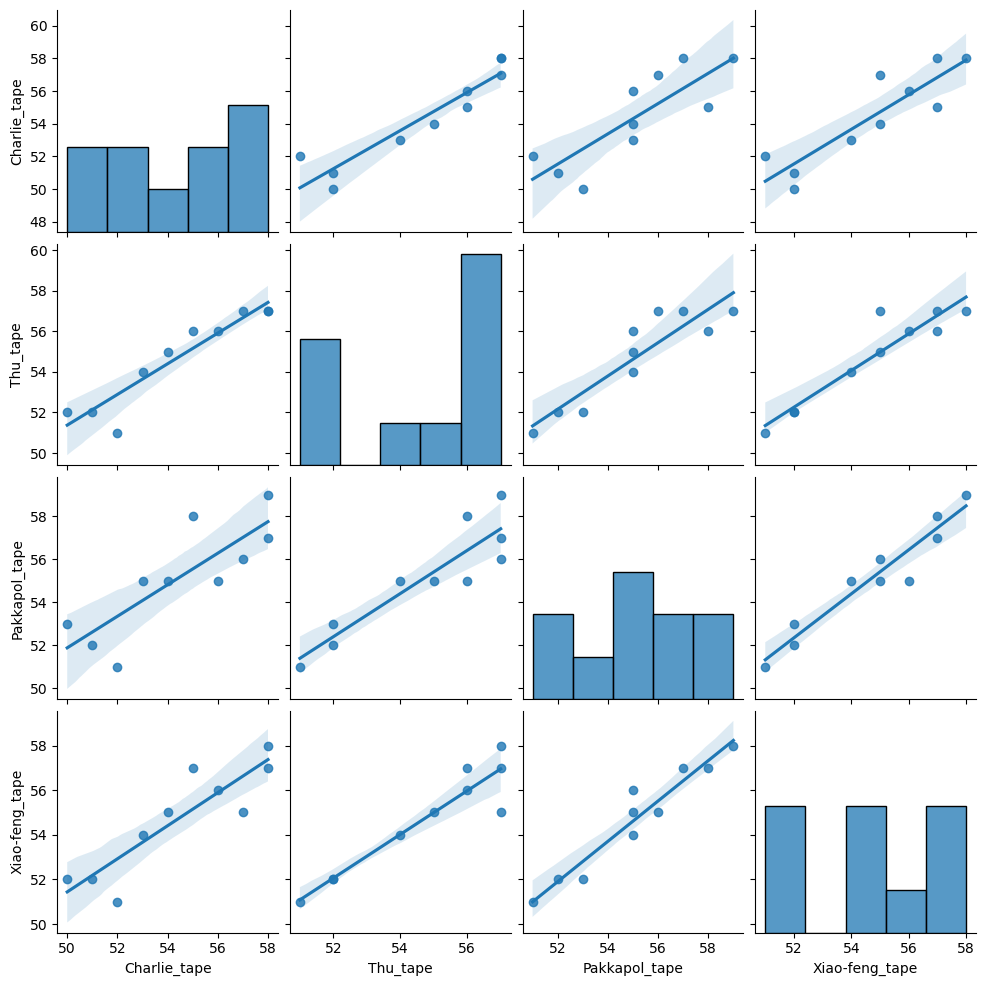

In [23]:
sns.pairplot(df, kind = 'reg')

In [28]:
df['Av_diameter'] = df[['Charlie_tape','Thu_tape', 'Pakkapol_tape', 'Xiao-feng_tape']].mean(axis = 1)

In [29]:
df

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Av_diameter
0,Aaron,56,56,55,56,55.75
1,Alice,58,57,59,58,58.00
2,Charlie,51,52,52,52,51.75
3,Thibauld,55,56,58,57,56.50
4,Thu,52,51,51,51,51.25
5,Pakkapol,50,52,53,52,51.75
6,Saima,54,55,55,55,54.75
7,Hillary,53,54,55,54,54.00
8,Faye,58,57,57,57,57.25
9,Xiao-feng,57,57,56,55,56.25


In [36]:
# Import Pearson
from scipy.stats import pearsonr

# Perform Pearson correlation
x=df['Charlie_tape']
y=df['Thu_tape']
correlation_coefficient, p_value = pearsonr(x, y)

# Print the results
print(f'Pearson Correlation Coefficient = {correlation_coefficient:.3f}')
print(f'p-value = {p_value:.12f}')

Pearson Correlation Coefficient = 0.939
p-value = 0.000054613780


In [32]:
x = np.array([1,3,5,7,8,9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])

In [34]:
# Import Pearson
from scipy.stats import pearsonr

# Perform Pearson correlation
correlation_coefficient, p_value = pearsonr(x, y)

# Print the results
print(f'Pearson Correlation Coefficient = {correlation_coefficient:.3f}')
print(f'p-value = {p_value:.12f}')

Pearson Correlation Coefficient = 0.975
p-value = 0.000038818393


In [13]:
df['Quality']=['Good', 'Bad','Good','Good', 'Bad','Good','Good', 'Bad','Good','Good']

In [14]:
df

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Quality
0,Aaron,56,56,55,56,Good
1,Alice,58,57,59,58,Bad
2,Charlie,51,52,52,52,Good
3,Thibauld,55,56,58,57,Good
4,Thu,52,51,51,51,Bad
5,Pakkapol,50,52,53,52,Good
6,Saima,54,55,55,55,Good
7,Hillary,53,54,55,54,Bad
8,Faye,58,57,57,57,Good
9,Xiao-feng,57,57,56,55,Good


In [16]:
df['Group_quality']=df['Group_member']+'_'+df['Quality']

In [17]:
df

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Quality,Group_quality
0,Aaron,56,56,55,56,Good,Aaron_Good
1,Alice,58,57,59,58,Bad,Alice_Bad
2,Charlie,51,52,52,52,Good,Charlie_Good
3,Thibauld,55,56,58,57,Good,Thibauld_Good
4,Thu,52,51,51,51,Bad,Thu_Bad
5,Pakkapol,50,52,53,52,Good,Pakkapol_Good
6,Saima,54,55,55,55,Good,Saima_Good
7,Hillary,53,54,55,54,Bad,Hillary_Bad
8,Faye,58,57,57,57,Good,Faye_Good
9,Xiao-feng,57,57,56,55,Good,Xiao-feng_Good


In [24]:
df[['Group','Quality2']] = df['Group_quality'].str.split('_', expand=True)
df

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Quality,Group_quality,Group,Quality2
0,Aaron,56,56,55,56,Good,Aaron_Good,Aaron,Good
1,Alice,58,57,59,58,Bad,Alice_Bad,Alice,Bad
2,Charlie,51,52,52,52,Good,Charlie_Good,Charlie,Good
3,Thibauld,55,56,58,57,Good,Thibauld_Good,Thibauld,Good
4,Thu,52,51,51,51,Bad,Thu_Bad,Thu,Bad
5,Pakkapol,50,52,53,52,Good,Pakkapol_Good,Pakkapol,Good
6,Saima,54,55,55,55,Good,Saima_Good,Saima,Good
7,Hillary,53,54,55,54,Bad,Hillary_Bad,Hillary,Bad
8,Faye,58,57,57,57,Good,Faye_Good,Faye,Good
9,Xiao-feng,57,57,56,55,Good,Xiao-feng_Good,Xiao-feng,Good


In [25]:
df_withdups = pd.DataFrame([[1, 6.5, 3], [1, 6.5, 3], [2, 4, 7.2], [0.9, 6.5, 3]])
df_withdups

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,2.0,4.0,7.2
3,0.9,6.5,3.0


In [27]:
df_withdups.drop_duplicates().reset_index()

,index,0,1,2
0,0,1.0,6.5,3.0
1,2,2.0,4.0,7.2
2,3,0.9,6.5,3.0


In [35]:
df_withdups.drop_duplicates().reset_index(drop = True)

,0,1,2
0,1.0,6.5,3.0
1,2.0,4.0,7.2
2,0.9,6.5,3.0


In [36]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.

    Considering certain columns is optional. Indexes, including time indexes
    are ignored.

    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.

        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.

    inplace : bool, default ``False``
        Whether to modify the DataFrame rather than creating a new one.
    ign